In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
data = pd.read_csv('./data.txt', names = ['feat1','feat2','label'])

In [8]:
data

,feat1,feat2,label
0,4.08,0.56,C1
1,-3.92,1.36,C2
2,2.52,-1.56,C1
3,-1.88,-2.76,C2
4,1.60,5.60,C1
5,-3.28,1.84,C2
6,0.64,2.88,C1
7,-4.00,4.00,C2
8,4.04,-0.52,C1
9,-4.80,0.80,C2


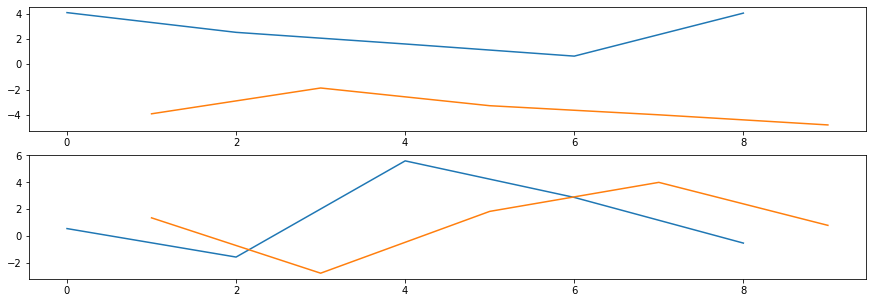

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(211)
plt.plot(data[data.label=='C1']['feat1'])
plt.plot(data[data.label=='C2']['feat1'])

plt.subplot(212)
plt.plot(data[data.label=='C1']['feat2'])
plt.plot(data[data.label=='C2']['feat2'])

plt.show()

## ---------------------------- QUESTION 2 ----------------------------

In [2]:
with open('data_old.txt') as f:
    data_old = f.readlines()
    f.close()

In [17]:
def format_data(data_old):
    feat_array = []
    label_array = []
    
    for row in data_old:
        # Splitting the string using comma separator
        data_list = row.replace(',\n','').strip().split(",")

        # Converting the first four elements to a numpy array of floats
        feat_array.append([float(i) for i in data_list[:4]])

        # Converting the fifth element to a numpy array of strings and removing the newline character
        label_array.append(data_list[4].replace("'", ""))
        
    return np.array(feat_array), np.array(label_array)

In [18]:
features, labels = format_data(data_old)

In [19]:
def train_test_split(features, labels):
    
    # Get unique labels
    unique_labels = np.unique(labels)

    # Initialize train and test data
    train_features, test_features, train_labels, test_labels = [], [], [], []

    # Loop through each label
    for label in unique_labels:
        # Get indices of occurrences of the label in the labels array
        label_indices = np.where(labels == label)[0]
        # Pick the first 6 occurrences for test and the rest for train
        test_indices = label_indices[:6]
        train_indices = label_indices[6:]
        # Append the corresponding features and labels to the train and test sets
        test_features.append(features[test_indices])
        test_labels.append(labels[test_indices])
        train_features.append(features[train_indices])
        train_labels.append(labels[train_indices])
        
    # Concatenate the train and test sets
    train_features = np.concatenate(train_features, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)
    test_features = np.concatenate(test_features, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)
        
    return train_features, test_features, train_labels, test_labels

In [20]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [33]:
def model_svm_iters(train_features, 
                    test_features, 
                    train_labels, 
                    test_labels, 
                    c_list = [1,10,100,200],
                    kernal = 'linear',
                    gamma = 'scale',
                    perf_comp = {'model':[],'c':[],'acc_train':[],'acc_test':[]}
                    ):
    """
    DESCRIPTION -
    """
    # Train the SVM model with a non-zero regularization weight C
    for c in c_list:
        if kernal == 'rbf':
            # train the SVM model with Gaussian Kernels
            clf = SVC(kernel='rbf', C=c, gamma='scale')
        else:
            clf = SVC(kernel='linear', C=c)
            
        clf.fit(train_features, train_labels)
        
        # Test the model on the testing set and calculate the classification accuracy
        y_pred_train = clf.predict(train_features)
        y_pred_test = clf.predict(test_features)

        accuracy_train = 100*(np.mean(train_labels == y_pred_train))
        accuracy_test = 100*(np.mean(test_labels == y_pred_test))
        
        print('For C = {} -----'.format(c))
        print('Training Accuracy: {}%'.format(round(accuracy_train,2)))
        print('Testing Accuracy: {}%\n'.format(round(accuracy_test,2)))
        
        perf_comp['model'].append(clf)
        perf_comp['c'].append(c)
        perf_comp['acc_train'].append(accuracy_train)
        perf_comp['acc_test'].append(accuracy_test)
    
    return perf_comp

## ------------------------------------ QUESTION 2-A ------------------------------------

Following are the steps:

- Load the dataset and split it into training and testing sets (DONE ALREADY).
- Train the SVM model on the training set.
- Test the model on the testing set and calculate the classification accuracy.
- Visualize the decision boundary and the support vectors.

In [22]:
## data edit for this question
train_labels_edit = [i if i=='Plastic' else 'Other' for i in train_labels]
test_labels_edit = [i if i=='Plastic' else 'Other' for i in test_labels]

In [38]:
perf_comp = {'model':[],'c':[],'acc_train':[],'acc_test':[]}

perf_comp = model_svm_iters(train_features, 
                            test_features, 
                            train_labels_edit, 
                            test_labels_edit, 
                            c_list=[1,5,10,50,100], 
                            kernal='linear',
                            gamma=None,
                            perf_comp=perf_comp)

For C = 1 -----
Training Accuracy: 69.61%
Testing Accuracy: 61.11%

For C = 5 -----
Training Accuracy: 85.29%
Testing Accuracy: 72.22%

For C = 10 -----
Training Accuracy: 97.06%
Testing Accuracy: 100.0%

For C = 50 -----
Training Accuracy: 100.0%
Testing Accuracy: 100.0%

For C = 100 -----
Training Accuracy: 100.0%
Testing Accuracy: 100.0%



### OBSERVATION - 
- As we can see, while increasing the regularization weight value of C we see an increase in the model accuracy.

- I have experimented by varying the C value to __1, 5, 10, 50, and 100.__

- After a little while, the accuracy stops increasing with increasing value of C.
- In this example - the __saturation point is at C = 10.__
- We can clearly see that for C = 50, 100; the model performance is not affected.

- Also, the model does not appear to be overfitting as the training and testing accuracies are consistent.

In [348]:
labels_all = np.concatenate([train_labels_edit, test_labels_edit])
features_all = np.concatenate([train_features, test_features])

IndexError: list index out of range

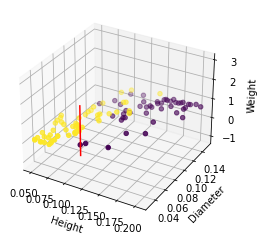

In [356]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# create figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot training data
ax.scatter(train_features[:,0], train_features[:,1], train_features[:,2], 
           c=[0 if i=="Plastic" else 1 for i in train_labels_edit])

# set axis labels
ax.set_xlabel('Height')
ax.set_ylabel('Diameter')
ax.set_zlabel('Weight')

# create meshgrid for height and diameter
hd = np.meshgrid(np.linspace(train_features[:,0].min(), train_features[:,0].max(), 100),
                 np.linspace(train_features[:,1].min(), train_features[:,1].max(), 100))

# create meshgrid for height and weight
hw = np.meshgrid(np.linspace(train_features[:,0].min(), train_features[:,0].max(), 100),
                 np.linspace(train_features[:,2].min(), train_features[:,2].max(), 100))

# create meshgrid for diameter and weight
dw = np.meshgrid(np.linspace(train_features[:,1].min(), train_features[:,1].max(), 100),
                 np.linspace(train_features[:,2].min(), train_features[:,2].max(), 100))

# flatten meshgrids and combine into a 2D array
hd_points = np.array([hd[0].flatten(), hd[1].flatten(), np.zeros(10000)]).T
hw_points = np.array([hw[0].flatten(), np.zeros(10000), hw[1].flatten()]).T
dw_points = np.array([np.zeros(10000), dw[0].flatten(), dw[1].flatten()]).T

# calculate distances to decision boundary for each point in meshgrid
hd_dist = clf.decision_function(hd_points)
hw_dist = clf.decision_function(hw_points)
dw_dist = clf.decision_function(dw_points)

# reshape distances into 2D arrays
hd_dist = hd_dist.reshape((100, 100))
hw_dist = hw_dist.reshape((100, 100))
dw_dist = dw_dist.reshape((100, 100))

# plot decision boundary for height and diameter
ax.contour(hd[0], hd[1], hd_dist, levels=[0], colors='red')

# plot decision boundary for height and weight
ax.contour(hw[0], hw[2], hw_dist, levels=[0], colors='blue')

# plot decision boundary for diameter and weight
ax.contour(dw[1], dw[2], dw_dist, levels=[0], colors='green')

# show plot
plt.show()

## ------------------------------------ QUESTION 2-B ------------------------------------

In [40]:
perf_comp = {'model':[],'c':[],'acc_train':[],'acc_test':[]}

perf_comp = model_svm_iters(train_features, 
                            test_features, 
                            train_labels_edit, 
                            test_labels_edit, 
                            c_list=[1,5,10,20,50,100], 
                            kernal='rbf',
                            gamma='scale',
                            perf_comp=perf_comp)

For C = 1 -----
Training Accuracy: 54.9%
Testing Accuracy: 66.67%

For C = 5 -----
Training Accuracy: 69.61%
Testing Accuracy: 50.0%

For C = 10 -----
Training Accuracy: 70.59%
Testing Accuracy: 61.11%

For C = 20 -----
Training Accuracy: 87.25%
Testing Accuracy: 66.67%

For C = 50 -----
Training Accuracy: 96.08%
Testing Accuracy: 100.0%

For C = 100 -----
Training Accuracy: 96.08%
Testing Accuracy: 100.0%



### OBSERVATION - 
- As expected and observed earleir, while increasing the regularization weight value of C we see an increase in the model accuracy.

- I have experimented by varying the C value to __1, 5, 10, 20, 50, and 100.__

- After a little while, the accuracy stops increasing with increasing value of C.
- In this example - the __saturation point is at C = 50.__
- We can clearly see that for C = 100; the model performance is not affected.

- Also, the model does not appear to be overfitting as the training and testing accuracies are consistent.